In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from joblib import load

In [2]:
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled = load('../../analysis and preprocessing/classification_preprocessed.joblib')

### Crtanje matrice

In [3]:
def cnf_matrix(y_pred_test, colormap): 
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                                        display_labels=[False, True])
    
    cm_display = cm_display.plot(cmap=colormap, values_format='g')


### Hiper parametri

In [4]:
params = {
    'n_estimators' : range(5, 20, 5),
    'criterion' : ['gini', 'entropy']
}

In [5]:
forest_classifier = RandomForestClassifier()
grid = GridSearchCV(estimator=forest_classifier, 
                    param_grid=params, 
                    cv=5, 
                    verbose=8)
grid.fit(X_train_scaled, y_train)
grid.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....criterion=gini, n_estimators=5;, score=0.887 total time=   0.1s
[CV 2/5] END ....criterion=gini, n_estimators=5;, score=0.888 total time=   0.1s
[CV 3/5] END ....criterion=gini, n_estimators=5;, score=0.888 total time=   0.1s
[CV 4/5] END ....criterion=gini, n_estimators=5;, score=0.878 total time=   0.1s
[CV 5/5] END ....criterion=gini, n_estimators=5;, score=0.892 total time=   0.0s
[CV 1/5] END ...criterion=gini, n_estimators=10;, score=0.902 total time=   0.1s
[CV 2/5] END ...criterion=gini, n_estimators=10;, score=0.893 total time=   0.1s
[CV 3/5] END ...criterion=gini, n_estimators=10;, score=0.897 total time=   0.1s
[CV 4/5] END ...criterion=gini, n_estimators=10;, score=0.886 total time=   0.1s
[CV 5/5] END ...criterion=gini, n_estimators=10;, score=0.889 total time=   0.1s
[CV 1/5] END ...criterion=gini, n_estimators=15;, score=0.893 total time=   0.2s
[CV 2/5] END ...criterion=gini, n_estimators=15;,

{'criterion': 'gini', 'n_estimators': 15}

In [6]:
forest_classifier = RandomForestClassifier(criterion='entropy', n_estimators=15)
forest_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15)

Train result: 0.9962924342486387
Test result: 0.8902406055690727

               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3127
           1       0.69      0.52      0.59       572

    accuracy                           0.89      3699
   macro avg       0.80      0.74      0.77      3699
weighted avg       0.88      0.89      0.88      3699



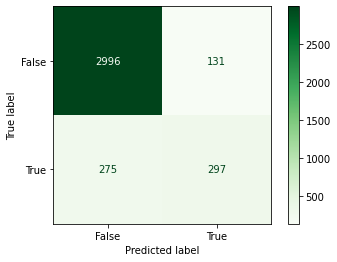

In [7]:
y_pred_train = forest_classifier.predict(X_train_scaled)
y_pred_test = forest_classifier.predict(X_test_scaled)
    
train_result = accuracy_score(y_train, y_pred_train)
print("Train result:", train_result)
test_result = accuracy_score(y_test, y_pred_test)
print("Test result:", test_result)
print("\n", classification_report(y_test, y_pred_test))

cnf_matrix(y_pred_test, plt.cm.Greens)

### Sada sa balansiranjem klasa

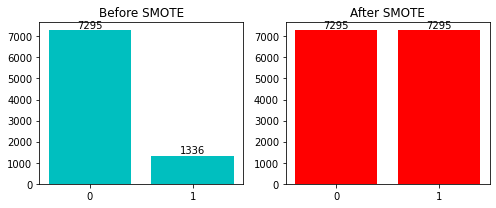

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))
ax1.set_title('Before SMOTE')
ax1.bar(['0','1'], [sum(y_train == 0), sum(y_train == 1)], color = ['c', 'c'])
for n in ax1.containers:
    ax1.bar_label(n)

oversample = SMOTE(random_state = 2, sampling_strategy = 'minority')
X_train_smote, y_train = oversample.fit_resample(X_train_scaled, y_train.ravel())

ax2.set_title('After SMOTE')
ax2.bar(['0','1'], [sum(y_train == 0), sum(y_train == 1)], color = ['r', 'r'])
for n in ax2.containers:
    ax2.bar_label(n)

plt.tight_layout()

In [9]:
params_smt = {
    'n_estimators' : range(5, 20, 5),
    'criterion' : ['gini', 'entropy']
}

In [10]:
forest_classifier_smt = RandomForestClassifier()
grid_smt = GridSearchCV(estimator=forest_classifier_smt, 
                    param_grid=params_smt, 
                    cv=5, 
                    verbose=8)
grid_smt.fit(X_train_smote, y_train)
grid_smt.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....criterion=gini, n_estimators=5;, score=0.842 total time=   0.1s
[CV 2/5] END ....criterion=gini, n_estimators=5;, score=0.947 total time=   0.2s
[CV 3/5] END ....criterion=gini, n_estimators=5;, score=0.959 total time=   0.1s
[CV 4/5] END ....criterion=gini, n_estimators=5;, score=0.947 total time=   0.1s
[CV 5/5] END ....criterion=gini, n_estimators=5;, score=0.946 total time=   0.2s
[CV 1/5] END ...criterion=gini, n_estimators=10;, score=0.834 total time=   0.2s
[CV 2/5] END ...criterion=gini, n_estimators=10;, score=0.963 total time=   0.3s
[CV 3/5] END ...criterion=gini, n_estimators=10;, score=0.959 total time=   0.2s
[CV 4/5] END ...criterion=gini, n_estimators=10;, score=0.954 total time=   0.2s
[CV 5/5] END ...criterion=gini, n_estimators=10;, score=0.957 total time=   0.2s
[CV 1/5] END ...criterion=gini, n_estimators=15;, score=0.861 total time=   0.3s
[CV 2/5] END ...criterion=gini, n_estimators=15;,

{'criterion': 'gini', 'n_estimators': 15}

In [11]:
forest_classifier_smt = RandomForestClassifier(criterion='entropy', n_estimators=15)
forest_classifier_smt.fit(X_train_smote, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15)

Train result: 0.9986977381768335
Test result: 0.874831035414977

               precision    recall  f1-score   support

           0       0.93      0.92      0.93      3127
           1       0.59      0.61      0.60       572

    accuracy                           0.87      3699
   macro avg       0.76      0.77      0.76      3699
weighted avg       0.88      0.87      0.88      3699



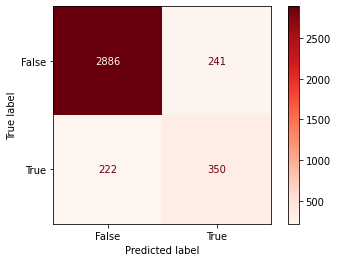

In [12]:
y_pred_train_smt = forest_classifier_smt.predict(X_train_smote)
y_pred_test_smt = forest_classifier_smt.predict(X_test_scaled)
    
train_result_smt = accuracy_score(y_train, y_pred_train_smt)
print("Train result:", train_result_smt)
test_result_smt = accuracy_score(y_test, y_pred_test_smt)
print("Test result:", test_result_smt)
print("\n", classification_report(y_test, y_pred_test_smt))

cnf_matrix(y_pred_test_smt, plt.cm.Reds)

In [13]:
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_test, y_pred_test)
roc_auc_forest = auc(fpr_forest, tpr_forest)

In [14]:
fpr_forest_smt, tpr_forest_smt, threshold_forest_smt = roc_curve(y_test, y_pred_test_smt)
roc_auc_forest_smt = auc(fpr_forest_smt, tpr_forest_smt)

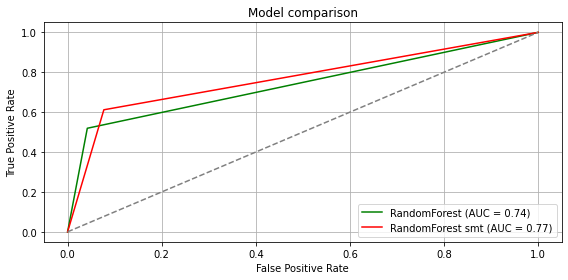

In [15]:
fig = plt.figure(figsize=(8, 4))

plt.plot(fpr_forest, tpr_forest, color='g', label = 'RandomForest (AUC = %0.2f)' % roc_auc_forest)
plt.plot(fpr_forest_smt, tpr_forest_smt, color='r', label = 'RandomForest smt (AUC = %0.2f)' % roc_auc_forest_smt)

plt.grid()
plt.title("Model comparison")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.tight_layout()
plt.show()

In [16]:
%store fpr_forest
%store tpr_forest
%store threshold_forest
%store roc_auc_forest

Stored 'fpr_forest' (ndarray)
Stored 'tpr_forest' (ndarray)
Stored 'threshold_forest' (ndarray)
Stored 'roc_auc_forest' (float64)


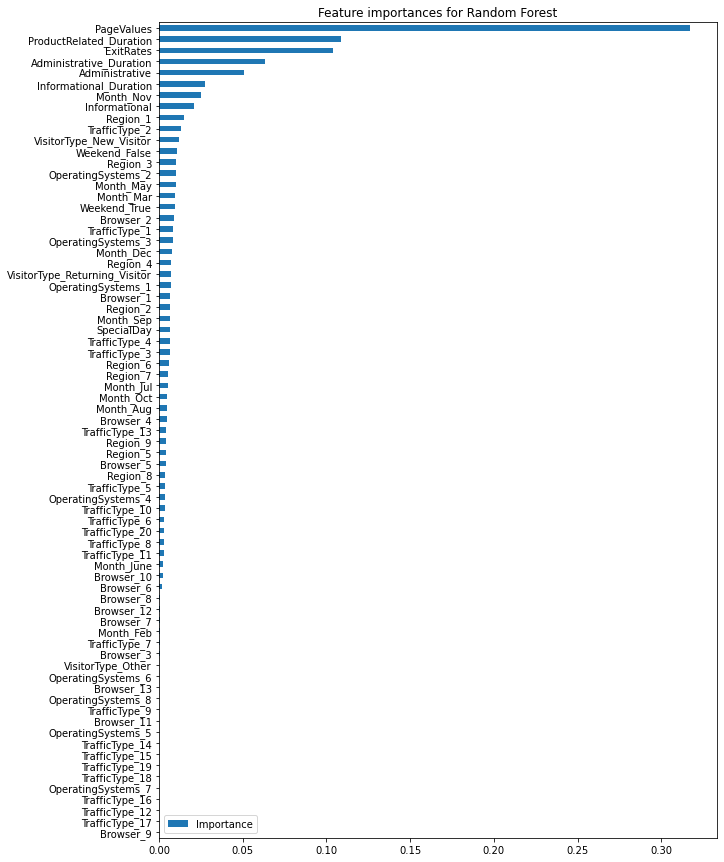

In [17]:
Feature_importances = pd.DataFrame(data = forest_classifier.feature_importances_, 
                                   index = X_test_scaled.columns, columns=['Importance'])

ax = Feature_importances[:].sort_values(by='Importance').plot.barh()
fig = ax.figure
fig.set_size_inches(10,15)
plt.title('Feature importances for Random Forest')
plt.show()